Projeto Ciência de Dados

Perguntas a serem respondidas

1 - Qual é a relação entre a idade e a probabilidade de desenvolver doença cardíaca?

2 - Há diferença significativa entre os sexos em relação à prevalência de doença cardíaca?

3 - Quais características mais contribuem para a predição de falha cardíaca?

- Ao final modelo preditivo para casos de falha cardíaca

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [29]:
base = pd.read_csv('heart.csv')
base.shape

(918, 12)

In [3]:
base.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
base.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
base.duplicated().sum()

0

1 - Qual é a relação entre a idade e a probabilidade de desenvolver doença cardíaca?

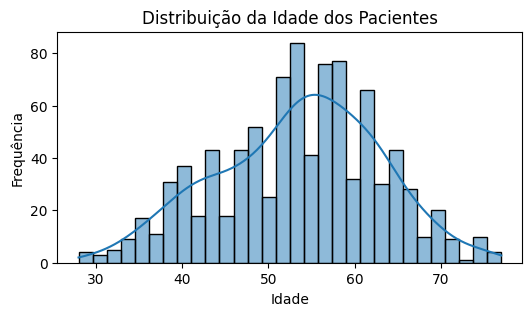

In [9]:
plt.figure(figsize=(6, 3))
sns.histplot(base['Age'], bins=30, kde=True)
plt.title('Distribuição da Idade dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

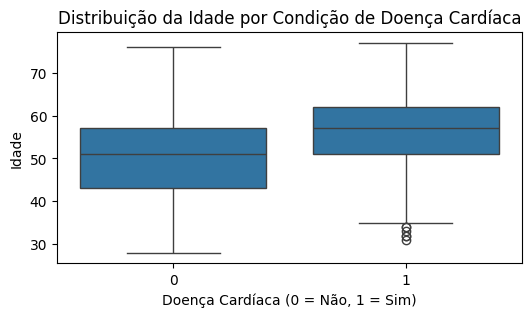

In [19]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='HeartDisease', y='Age', data=base)
plt.title('Distribuição da Idade por Condição de Doença Cardíaca')
plt.xlabel('Doença Cardíaca (0 = Não, 1 = Sim)')
plt.ylabel('Idade')
plt.show()

C:\Users\jggno\AppData\Local\Temp\ipykernel_9384\2060742349.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcao = base.groupby('FaixaEtaria')['HeartDisease'].mean()


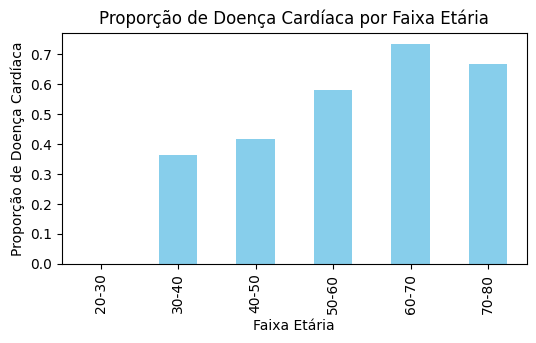

In [58]:
base['FaixaEtaria'] = pd.cut(base['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

proporcao = base.groupby('FaixaEtaria')['HeartDisease'].mean()

plt.figure(figsize=(6, 3))
proporcao.plot(kind='bar', color='skyblue')
plt.title('Proporção de Doença Cardíaca por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Proporção de Doença Cardíaca')
plt.show()

In [17]:
#número MUITO negativo logo a idade influencia bastante
doenca = base[base['HeartDisease'] == 1]['Age']
sem_doenca = base[base['HeartDisease'] == 0]['Age']

t_stat, p_value = ttest_ind(doenca, sem_doenca)

print(f'Estatística t: {t_stat}, p-value: {p_value}')

Estatística t: 8.897234373161165, p-value: 3.0079532400497047e-18


2 - Há diferença significativa entre os sexos em relação à prevalência de doença cardíaca?


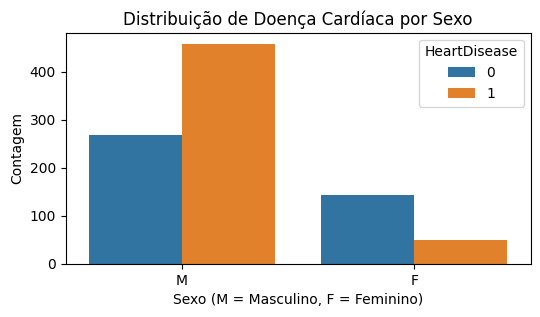

In [21]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Sex', hue='HeartDisease', data=base)
plt.title('Distribuição de Doença Cardíaca por Sexo')
plt.xlabel('Sexo (M = Masculino, F = Feminino)')
plt.ylabel('Contagem')
plt.show()

In [23]:
proporcao_sexo = base.groupby('Sex')['HeartDisease'].mean()
proporcao_sexo

Sex
F    0.259067
M    0.631724
Name: HeartDisease, dtype: float64

In [17]:
#valor MUITO negativo no teste qui-quadrado, logo a relação é muito grande
tabela_contagem = pd.crosstab(base['Sex'], base['HeartDisease'])
chi2, p_value, dof, expected = chi2_contingency(tabela_contagem)
print(f"p-value: {p_value}")

p-value: 4.597617450809164e-20


3 - Quais características mais contribuem para a predição de falha cardíaca?

In [13]:
X = base.drop('HeartDisease', axis=1)
y = base['HeartDisease']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

importancias = modelo.feature_importances_
nome_variaveis = X.columns

variaveis_importantes = pd.DataFrame({'Variaveis': nome_variaveis, 'Importancia': importancias})
variaveis_importantes = variaveis_importantes.sort_values(by='Importancia', ascending=False)

print(variaveis_importantes)

            Variaveis  Importancia
14        ST_Slope_Up     0.149099
4               MaxHR     0.117511
5             Oldpeak     0.112069
13      ST_Slope_Flat     0.108416
2         Cholesterol     0.103851
12   ExerciseAngina_Y     0.101613
0                 Age     0.088802
1           RestingBP     0.071584
6               Sex_M     0.036660
7   ChestPainType_ATA     0.033246
8   ChestPainType_NAP     0.023194
3           FastingBS     0.022405
10  RestingECG_Normal     0.015478
11      RestingECG_ST     0.009124
9    ChestPainType_TA     0.006949


Criação de modelo preditivo para saber se terá ou não um ataque cardíaco

In [48]:
variaveis_selecionadas = ['ST_Slope', 'Oldpeak', 'Cholesterol', 
                     'ExerciseAngina', 'MaxHR', 'Age', 'RestingBP', 'Sex']
X_selecionado = base[variaveis_selecionadas]

# Variável alvo
y = base['HeartDisease']

# Codificação de variáveis categóricas, se necessário
X_selecionado = pd.get_dummies(X_selecionado, drop_first=True)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selecionado, y, test_size=0.2, random_state=42)

# Inicializando e treinando o modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# Fazendo previsões
y_previsao = modelo.predict(X_test)

# Avaliando o modelo
precisao = accuracy_score(y_test, y_previsao)
print(f"Precisão: {precisao:.2f}")

Precisão: 0.85
